# Introduction to SciServer Compute

Welcome to SciServer Compute, your free online resource for working with large scientific datasets. With this notebook, you will use Compute to do real science in less than five minutes. This starting notebook works through an astronomy example, but no prior knowledge of astronomy is required.

You can use this example notebook (or any others) as a starting point for your own notebooks. Please create a copy before modifying to ensure your work will not be overwritten by future updates.

These Example Notebooks are all written in Python 3. Please make sure that "Python 3" appears in the top right corner of this page; if not, please change to Python 3 using the Kernel menu. If you prefer to work in Python 2, please close this notebook and look at the equivalent introductory notebook in the "python2" directory. In the near future, we will adapt these example notebooks to work with R as well.

If you are already familiar with Python syntax, you can skip the "Hello world" example below and go straight to the "Using SciServer Modules" section.

Notebooks consist of Markdown cells (with a white background, like this one) and Code cells (with a gray background). Markdown cells contain explanatory text; Code cells contain executable code. To run the code, click inside a Code cell and click the Play button above (or use the keyboard shortcut Shift-Enter). Try a famous example by running the Code cell below.

## Introduction to Python

Python is a simple programming language used often in science and engineering. Online notebooks like this one let you develop scripts in Python line by line, experimenting and making changes as you see the results.

Teaching all of Python syntax is beyond the scope of this tutorial, but the two subsections below will give you enough to follow the SciServer examples in this notebook. If you would like to learn more, Python has <a href="https://docs.python.org/3/tutorial/">an excellent tutorial</a> where you can learn the basics.

### Hello world!

When learning a new programming language, tradition dictates starting with the "Hello world!" example, which prints the statement "Hello world!". This famous program is easy to write in Python, requiring just a <code>print()</code> statement. Try it below.

In [1]:
print('Hello world!')

Hello world!


Congratulations, you just wrote your first Python program! Try changing the message inside the parentheses and see how the output changes.

### Modules

Python was created to be a "thin" programming language, with only basic features - but to be easily extended to incorporate new features. Extended features in Python are available through <strong>modules</strong> created for specific purposes. Anyone can write a module and advertise it online.

To use a module in a Python script, you must first import it with the command:

<code>import <i>modulename</i></code>

After you import a module in a program, you can use any of the functions contained within that module anywhere within that program. In many Python programs, including these example notebooks, the first few lines are <code>import</code> statements that import all modules that will be needed later.

This was just a very quick introduction to the basics of Python, but it will give you enough knowledge to follow the SciServer example below. There are lots of resources online for learning Python; the official <a href="https://docs.python.org/3/tutorial/">Python tutorial</a> is a great place to start.

## Using SciServer modules

The SciServer team has created a set of modules to communicate between SciServer Compute and its other components. Once you have imported these SciServer modules into a notebook, you can use the functions contained in those modules them anywhere in that notebook. Modules are currently available in Python and R, with plans for Matlab; this example notebook demonstrates the Python 3 modules. All modules are documented on the SciServer site at http://www.sciserver.org/support/documentation/.

This notebook gives a simple example from astronomy of how to use two of the SciServer modules. The <code><a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module">SciServer.SkyServer</a></code> module contains astronomy-specific functions, and the <code><a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#module-SciServer.CasJobs">SciServer.CasJobs</a></code> module is a powerful and flexible way to communicate with any of the many scientific datasets available through the SciServer system.

Before you can use any commands that are included in a module, you must first import the module. You can do that by running the next Code cell.

In [2]:
import SciServer.SkyServer as SkyServer  # communicate with SkyServer
import SciServer.CasJobs as CasJobs      # communicate with CasJobs
import matplotlib.pyplot as plt          # create plots (https://matplotlib.org/api/pyplot_api.html)
from pprint import pprint                # human-readable data object printing (https://docs.python.org/3.5/library/pprint.html)
print('modules imported')

modules imported


### Example: An Unexpected Discovery

SciServer's unique approach to managing big data grew from the experience of astronomy's <a href="http://www.sdss.org">Sloan Digital Sky Survey</a> (SDSS), a continuing worldwide effort to make a map of the Universe. One of the survey's most surprising discoveries was made in 2007 by a citizen scientist named Hanny Van Arkel. 

<a href="http://news.bbc.co.uk/2/hi/science/nature/7543776.stm">Hanny's Voorwerp</a> is a gas cloud illuminated by a jet of gas from an active region at the center of a galaxy called IC 2497 &mdash; but today, IC 2497 is a normal galaxy with no active center. Hanny's Voorwerp provides clear evidence that 50,000 years ago, the center of IC 2497 held gas being heated to incredible temperatures while falling into a black hole. Such evidence of a "disappearing quasar" had been predicted before, but Hanny's Voorwerp was the first example ever found &mdash; and it was found by a high school teacher looking through the big data of the Sloan Digital Sky Survey.

### Step 1: See Hanny's Voorwerp

The Python commands in the Code cell below use the <code><a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module">SkyServer.getJpegImgCutout</a></code> function, with default options, to get an image of the region around Hanny's Voorwerp. The image comes from SDSS Data Release 14, and is similar to what Hanny Van Arkel saw in 2007. Note also that the Code cell starts by importing commands used in the rest of this notebook.

Click on the Code cell below, then click the play button (or press Shift-Enter) to run the code. Hanny's Voorwerp is the oddly-shaped blue blob in the middle of the image.

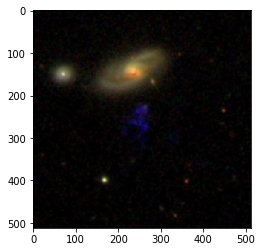

In [3]:
# Get SDSS image - simple example for Hanny's Voorwerp with only required parameters.
ra_center = 145.2658   # RA of image center as decimal degrees
dec_center = 34.7265   # Dec of image center as decimal degrees
pixel_scale = 0.2

# create image using SkyServer.getJpegImgCutout
img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center, scale = pixel_scale)  

# show the image
plt.imshow(img)    # show image using pyplot.imshow

### Step 2: Get data for IC 2497

As described above, one of the reasons that Hanny's Voorwerp is so unusual is that its companion galaxy, IC 2497, looks so normal. The Code cell below uses the <code><a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module">SkyServer.objectSearch</a></code> function to gather all data for IC 2497 from SDSS Data Release 14.

The SkyServer.objectSearch function can take various inputs; this example uses the (ra, dec) position of the galaxy. The function returns a complicated data structure; the section of the Code cell containing the <code>for</code> loops parses this structure and returns a dictionary containing the magnitudes (measured brightness) of the galaxy in each of the SDSS's five wavelengths of light: ultraviolet (u), green (g), red (r), and infrared (i and z). The lines that follow calculate a magnitude and color (difference between magnitudes) to compare to other galaxies in step 3. The last two lines demonstrate two different ways to print output in Python.

In [4]:
# First, look up the astronomical coordinates for IC 2497 through a web search
## Coordinates are right ascension (ra) and declination (dec), similar to longitude/latitude on Earth
### IC2497: ra = 145.267 ; dec = 34.733

# Send the coordinates (ra, dec) to the SkyServer.objectSearch function
## The function returns a list of lists with dictionaries inside
ic2497 = SkyServer.objectSearch(ra=145.267, dec=34.733)

# Uncomment to print the full data structure returned by SkyServer.objectSearch, using pprint
### This will show you all information about IC 2497 that is available in SDSS Data Release 14
#pprint(ic2497)


# The commands below parse the complicated list-of-list-of-dictionaries data structure...

# Initialize dictionaries to hold the galaxy's position and magnitude (brightness) data
magnitudes = {}

for thistable in ic2497:   # Iterate over each item in the data table list
    if (thistable['TableName'] == 'ImagingData'):
        ic2497_imagingdata = thistable['Rows']    # Copy the inner list containing imaging data

for x in ic2497_imagingdata:   # Iterate over each dictionary that holds the imaging data
    for thiskey, thisvalue in x.items():     # Iterate over each key/value pair...
        if (thiskey in ('u', 'g', 'r', 'i', 'z')):
            magnitudes[thiskey] = thisvalue         # Save the magnitudes in a new dictionary

# Calculate u magnitude and u-r "color" (magnitude difference) to use in step 3
ic2497_mag_u = magnitudes['u']
ic2497_color_ur = magnitudes['u'] - magnitudes['r']

# Print the u and r magnitudes
print('Magnitudes of IC2497: ultraviolet (u) = ', magnitudes['u'], '; red (r) = ',magnitudes['r'])
print('\n')

# Print the u magnitude and u-r color, using Python's formatted printing
print('Magnitudes of IC2947: ultraviolet (u) = {0:.3f}; color (u-r) = {1:.2f}'.format(ic2497_mag_u, ic2497_color_ur))

Magnitudes of IC2497: ultraviolet (u) =  17.27209 ; red (r) =  14.62752


Magnitudes of IC2947: ultraviolet (u) = 17.272; color (u-r) = 2.64


### Step 3: Get data for many galaxies

Is IC 2497, the galaxy next to Hanny's Voorwerp, really just a normal galaxy? To answer that question, we need to know what a "normal galaxy" looks like. One tool that astronomers often use to examine galaxies is a <em>color-magnitude diagram</em>. 

The Code cell below creates a color-magnitude diagram by submitting a simple SQL query to SDSS Data Release 14 to find data for 10,000 galaxies. It submits the query using the <code><a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#module-SciServer.CasJobs">CasJobs.executeQuery</a></code> function.

Once it has retrieved color and magnitude data for the 10,000 galaxies, it uses the <a href="https://matplotlib.org/api/pyplot_api.html">pyplot</a> library to create a scatterplot of the data, then overlays a big red dot at the (u, u-r) value corresponding to IC 2497. The plot shows that IC 2497 is brighter than the average galaxy in the sample, but its color-magnitude properties are well within the normal range.

As this example demonstrates, an important skill in working with data using SciServer is to know how to use SQL (Structured Query Language) to make requests of databases. SkyServer has <a href="http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx">a tutorial on how to use SQL</a>, and many other quality tutorials are available online.

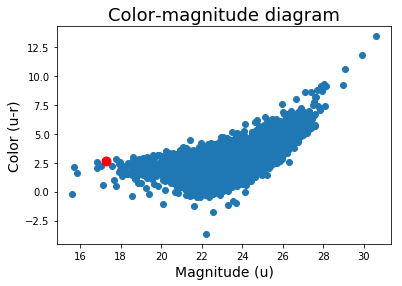

In [5]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer

query = 'select top 10000 u, r, u-r as color_ur from galaxy where clean=1'
result = CasJobs.executeQuery(query,'dr13')
plt.scatter(result['u'], result['color_ur'])
plt.scatter(ic2497_mag_u, ic2497_color_ur, color='red', s=81)  # overprint a big red dot for IC 2497


# Label the plot and axes
plt.title('Color-magnitude diagram',fontsize=18)
plt.xlabel('Magnitude (u)',fontsize=14)
plt.ylabel('Color (u-r)',fontsize=14)

plt.show()

## Next steps

We hope you have enjoyed this whirlwind tour of SciServer Compute through the lens of a big data project in astronomy. SciServer tools are useful for many other areas of science as well; those other areas of science will make frequent use of the <a href="http://www.sciserver.org/docs/sciscript-python/SciServer.html#module-SciServer.CasJobs">SciServer.CasJobs</a> module to access data.

You have already downloaded our SciServer Examples Notebooks into the <strong>examples</strong> folder of this container. Along with this introductory notebook, your examples folder contains a subfolder called "components". This subfolder contains four IPython notebooks (.ipynb files), one for each of the four components of the SciServer system visible to Compute: SkyServer, CasJobs, SciDrive, and SkyQuery. Those notebooks show you how to use modules to communicate between SciServer Compute and each of these SciServer components.

You can use any of the example notebooks (including this one) as a starting point to create your own Python scripts. If you do so, please create a copy rather than editing the example notebooks directly. Otherwise, your changes might be overwritten by future changes to the SciServer system.

If you have questions about any aspect of SciServer, please email our helpdesk at <code><strong>sciserver-helpdesk@jhu.edu</strong></code>. Thank you!